# Get Dataset

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# metadata
print(wholesale_customers.metadata)

# variable information
print(wholesale_customers.variables)


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [127]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [128]:
y

,Region
0,3
1,3
2,3
3,3
4,3
...,...
435,3
436,3
437,3
438,3


In [129]:
y['Region'].unique()

array([3, 1, 2])

In [130]:
X.dtypes

Channel             int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [131]:
y.dtypes

Region    int64
dtype: object

In [3]:
clusters = {}

# Start Clustering

# Scale the data

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
scaled_X

array([[ 1.44865163,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

# K-Means

In [136]:
# Define the number of clusters (k)
k = 3

In [137]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

In [138]:
# Fit the model to the scaled data
kmeans.fit(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [139]:
# Get the cluster labels
cluster_labels = kmeans.labels_

In [140]:
cluster_labels

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2,

In [141]:
# Add the cluster labels:
clusters['K_Means'] = cluster_labels
clusters

{'K_Means': array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
        0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
        2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1,
        0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
        0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
        0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0

In [142]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


**Plotting the clusters**

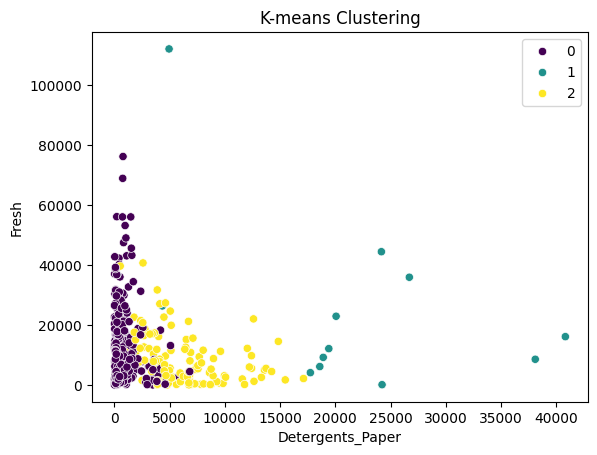

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
feature_1 = 'Detergents_Paper'
feature_2 = 'Fresh'
sns.scatterplot(x=X[feature_1], y=X[feature_2], hue=clusters['K_Means'], palette='viridis')
plt.title('K-means Clustering')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()


# Agglomerative Hierarchical

In [144]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# Define the number of clusters (if not defined, the algorithm will try to determine the optimal number)
n_clusters = 3

In [146]:
# Initialize the Agglomerative Clustering model
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

In [148]:
# Fit the model to the data
cluster_labels = agglomerative.fit_predict(scaled_X)

In [149]:
cluster_labels

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [150]:
# Add the cluster labels
clusters['Agglomerative_Hierarchical'] = cluster_labels

In [151]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


**Plot the clusters**

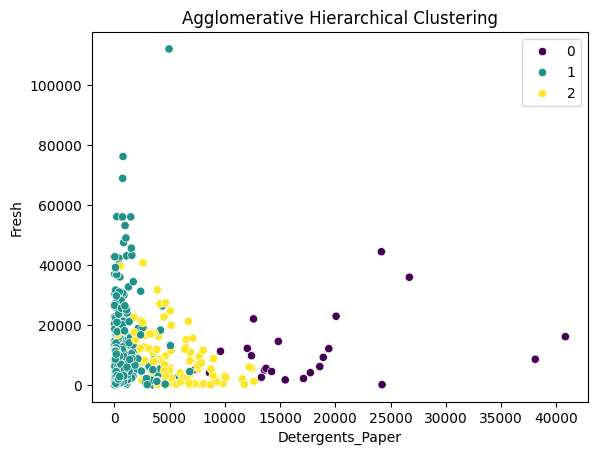

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
feature_1 = 'Detergents_Paper'
feature_2 = 'Fresh'
sns.scatterplot(x=X[feature_1], y=X[feature_2], hue=clusters['Agglomerative_Hierarchical'], palette='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()


# DBSCAN

In [153]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)

In [155]:
# Fit the model to the data and get the cluster labels
cluster_labels = dbscan.fit_predict(scaled_X)

In [156]:
# Add the cluster labels
clusters['DBSCAN'] = cluster_labels

In [157]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


**Plot the clusters**

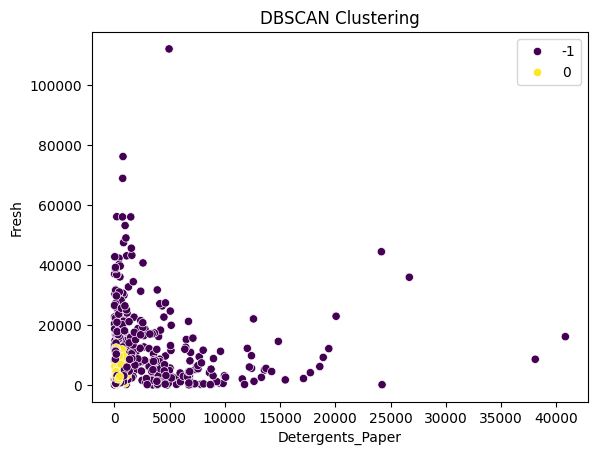

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
feature_1 = 'Detergents_Paper'
feature_2 = 'Fresh'
sns.scatterplot(x=X[feature_1], y=X[feature_2], hue=clusters['DBSCAN'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()


# CLIQUE

**Import Libraries**

In [4]:
pip install pyclustering

In [5]:
import pandas as pd
from pyclustering.cluster import clique
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Prepare data for clustering
data = scaled_X.tolist()

In [10]:
data[0]

[1.4486516314475937,
 0.052933189809386286,
 0.5235677732188025,
 -0.04111489343644868,
 -0.589367155775102,
 -0.043568731904070554,
 -0.06633905751821152]

In [11]:
import numpy as np

np.asarray(data).shape

(440, 7)

In [12]:
# Set CLIQUE parameters
grid_resolution = 10  # grid resolution
minimal_size = 3  # minimal size of the cluster

In [13]:
# Create CLIQUE instance
clique_instance = clique.clique(data, grid_resolution, minimal_size)

In [ ]:
# Start clustering process
clique_instance.process()

In [ ]:
# Get clusters
CLIQUE_clusters = clique_instance.get_clusters()

In [ ]:
# Generate cluster labels
cluster_labels = [-1] * len(data)
for cluster_id, cluster in enumerate(CLIQUE_clusters):
    for index in cluster:
        cluster_labels[index] = cluster_id

In [ ]:
# Add the cluster labels:
clusters['CLIQUE'] = cluster_labels

**Plot the results**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
feature_1 = 'Detergents_Paper'
feature_2 = 'Fresh'
sns.scatterplot(x=X[feature_1], y=X[feature_2], hue=clusters['CLIQUE'], palette='viridis')
plt.title('CLIQUE Clustering')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()
